In [6]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [7]:
#Load Dataset
dataset = pd.read_csv('./upliftdata.csv')
dataset.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [8]:
#Create copy of Dataset
dataset2=dataset

#Convert Object columns to numeric
dataset2 = pd.get_dummies(dataset2)
dataset2.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,0,0,1,0,0,1,0,1,0,0
1,6,329.08,1,1,1,0,1,0,0,0,0,1,0,0,1
2,7,180.65,0,1,1,0,0,1,0,0,0,1,1,0,0
3,9,675.83,1,0,1,0,1,0,0,0,0,1,0,1,0
4,2,45.34,1,0,0,0,0,0,1,0,0,1,1,0,0


In [9]:
#Create x and y variables
x = dataset2.drop('conversion', axis=1).to_numpy()
y = dataset2['conversion'].to_numpy()

#Create x and y datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, stratify=y, random_state = 100)

#Scale Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [10]:
#Create Response Model
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.tree import DecisionTreeClassifier  

for name,method in [('DT', DecisionTreeClassifier(random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))          


Estimator: DT
[[9524 1397]
 [1542  337]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     10921
           1       0.19      0.18      0.19      1879

    accuracy                           0.77     12800
   macro avg       0.53      0.53      0.53     12800
weighted avg       0.76      0.77      0.77     12800



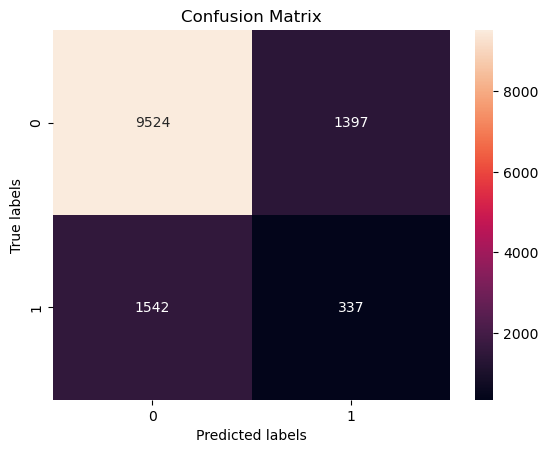

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt     
cm = confusion_matrix(y_test, predict)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['yes', 'no']); ax.yaxis.set_ticklabels(['yes', 'no']);

In [ ]:
337 -> True Positive
1542 -> False Negative
1397 -> False Positive
9524 -> True Negative